In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore
import numpy as np
import pandas as pd
from tabulate import tabulate

In [111]:
def process_data(filename, type="sleep"):
    data = pd.read_pickle(filename)[type]
    split_dfs = {}
    
    for n in data:  # 5, 35
        for language in data[n]:  # rust, cpp, nonservice
            summary_rows = []
            for df in data[n][language]: #each experiment
                if "PACKAGE_ENERGY (J)" in df.columns:
                    energy = df["PACKAGE_ENERGY (J)"].iloc[-1] - df["PACKAGE_ENERGY (J)"].iloc[0]
                    if "TIME" in df.columns:
                        time_diff = df['TIME'].iloc[-1] - df['TIME'].iloc[0]
                    elif "Time" in df.columns:
                        time_diff = df['Time'].iloc[-1] - df['Time'].iloc[0]
                    summary_rows.append({
                        "PACKAGE ENERGY (J)": energy,
                        "EDP": time_diff,
                        "tool": language,
                        "type": n
                    })
                

            summary_df = pd.DataFrame(summary_rows)
            # remove outliers from each experiment set
            if 'PACKAGE ENERGY (J)' in summary_df.columns:
                z_scores = zscore(summary_df['PACKAGE ENERGY (J)'])
                full_df = summary_df[np.abs(z_scores) < 2]

            split_dfs[f"{language}_{type}_{n}"] = full_df
    
    return split_dfs

In [112]:
data_sleep = process_data("results.pkl", "sleep")
data_fib = process_data("results.pkl", "fib")

data_sleep_p_data = [
    ["Rust", shapiro(data_sleep['rust_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['rust_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_40']['PACKAGE ENERGY (J)'])[1]],
    ["C++", shapiro(data_sleep['cpp_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['cpp_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_40']['PACKAGE ENERGY (J)'])[1]],
    ["Classic", shapiro(data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['nonservice_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_40']['PACKAGE ENERGY (J)'])[1]],
]
print(tabulate(data_sleep_p_data, headers=["Type", "Sleep(10)", "Sleep(20)", "Fib(10)", "Fib(35)", "Fib(40)"], tablefmt="grid"))


+---------+-------------+-------------+-------------+-------------+-------------+
| Type    |   Sleep(10) |   Sleep(20) |     Fib(10) |     Fib(35) |     Fib(40) |
+=========+=============+=============+=============+=============+=============+
| Rust    |    0.301927 |    0.583192 | 1.27111e-05 | 0.0883172   | 0.00148101  |
+---------+-------------+-------------+-------------+-------------+-------------+
| C++     |    0.539135 |    0.122816 | 0.000463756 | 0.0264623   | 0.00282737  |
+---------+-------------+-------------+-------------+-------------+-------------+
| Classic |    0.863428 |    0.808974 | 0.686482    | 0.000408684 | 9.96085e-05 |
+---------+-------------+-------------+-------------+-------------+-------------+


/tmp/ipykernel_11144/2752163282.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])


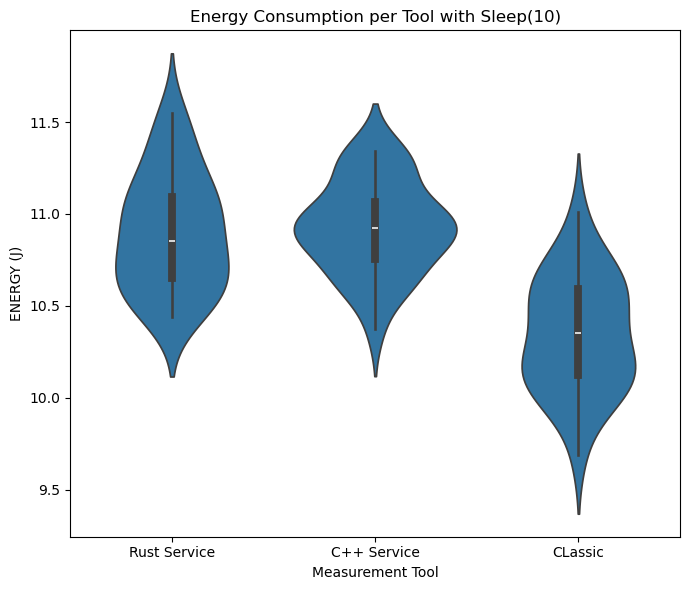

/tmp/ipykernel_11144/2752163282.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])


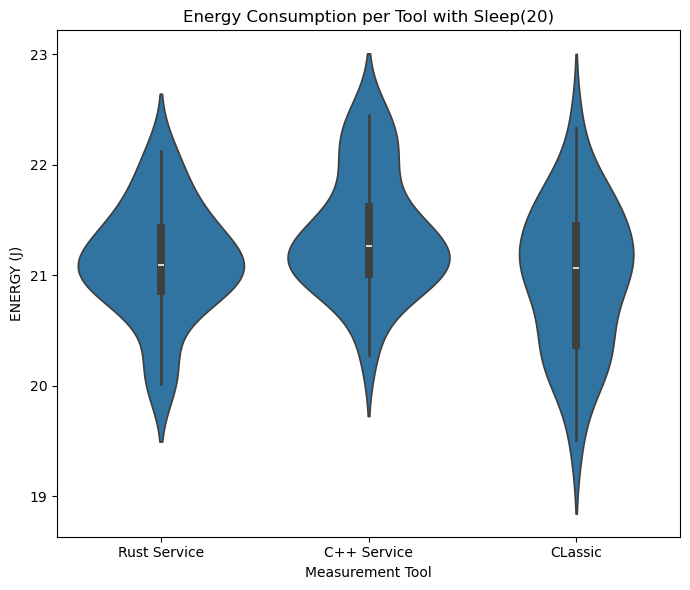

In [126]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]))
plt.title("Energy Consumption per Tool with Sleep(10)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]))
plt.title("Energy Consumption per Tool with Sleep(20)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])
plt.tight_layout()
plt.show()

/tmp/ipykernel_11144/1268712469.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])


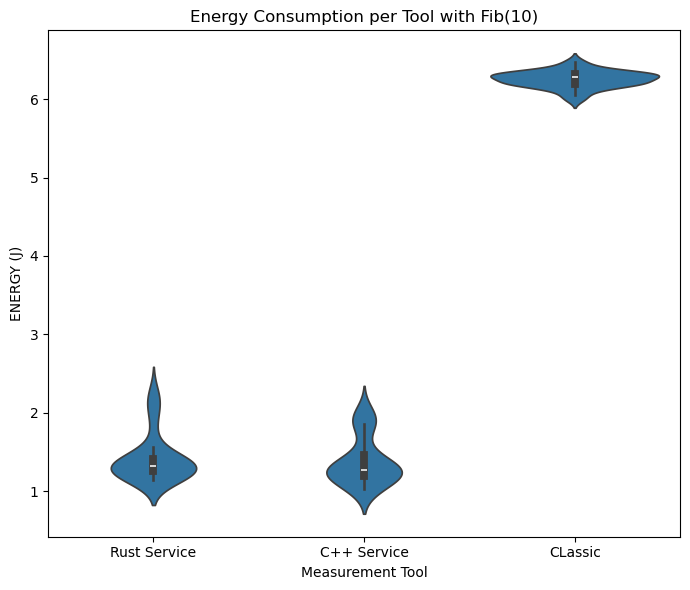

/tmp/ipykernel_11144/1268712469.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])


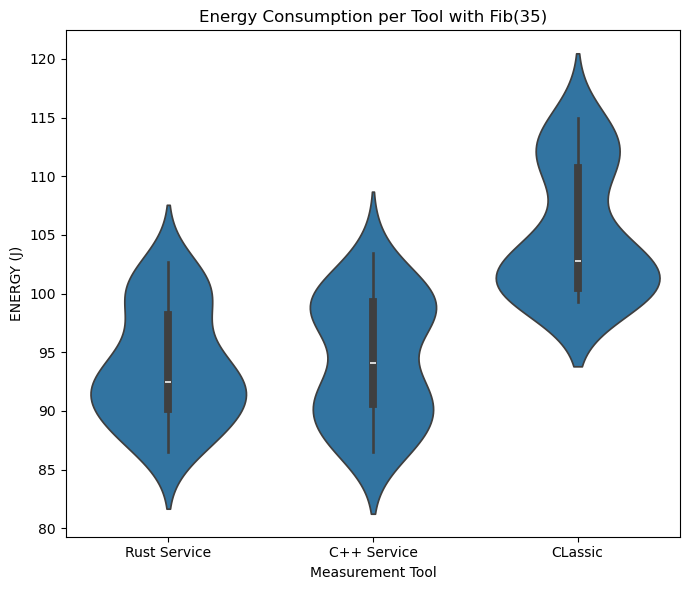

/tmp/ipykernel_11144/1268712469.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])


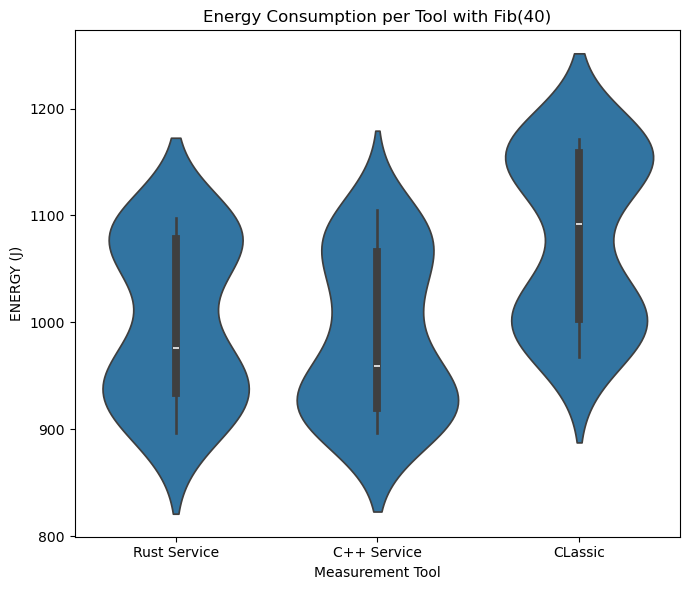

In [123]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_10'], data_fib['cpp_fib_10'], data_fib['nonservice_fib_10']]))
plt.title("Energy Consumption per Tool with Fib(10)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_35'], data_fib['cpp_fib_35'], data_fib['nonservice_fib_35']]))
plt.title("Energy Consumption per Tool with Fib(35)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_40'], data_fib['cpp_fib_40'], data_fib['nonservice_fib_40']]))
plt.title("Energy Consumption per Tool with Fib(40)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "CLassic"])
plt.tight_layout()
plt.show()

/tmp/ipykernel_11144/4251735799.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/4251735799.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])


Text(0, 0.5, '')

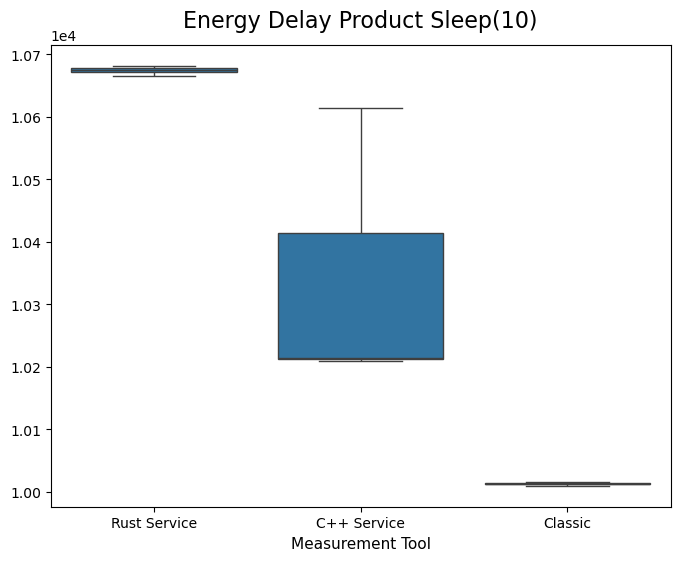

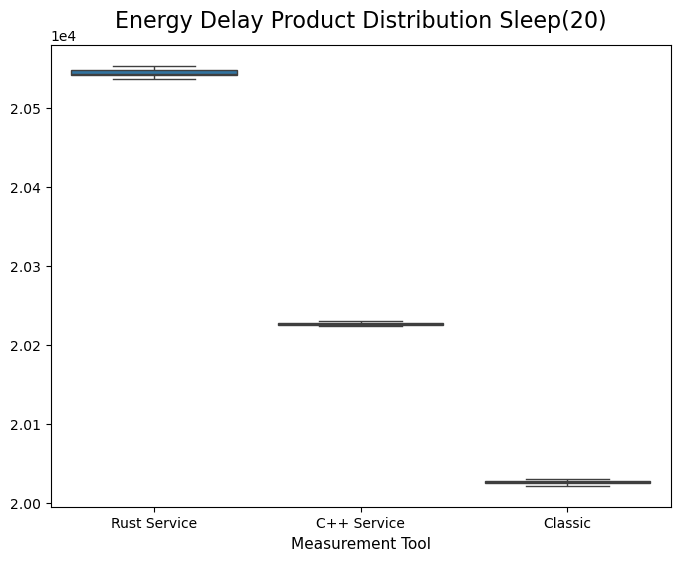

In [115]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Sleep(10)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Sleep(20)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

/tmp/ipykernel_11144/476950635.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/476950635.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/476950635.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])


Text(0, 0.5, '')

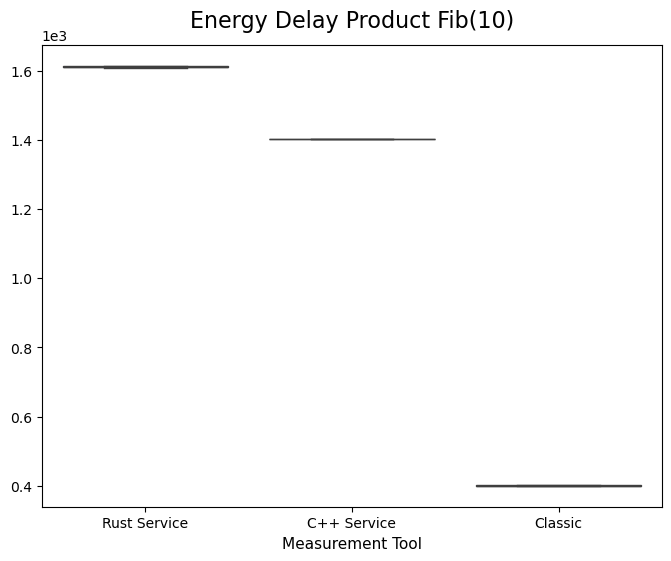

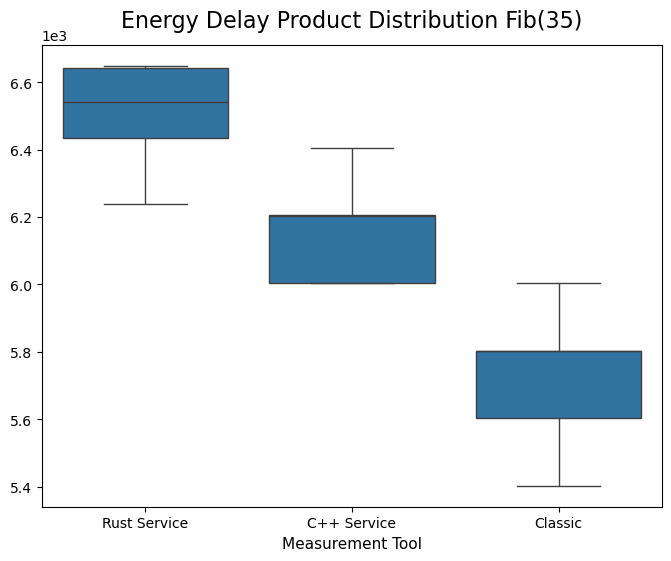

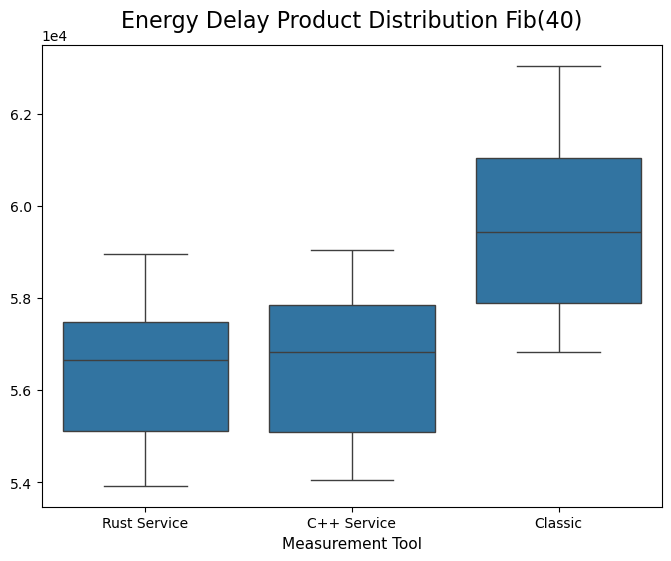

In [124]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_10'], data_fib['cpp_fib_10'], data_fib['nonservice_fib_10']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Fib(10)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_35'], data_fib['cpp_fib_35'], data_fib['nonservice_fib_35']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Fib(35)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_40'], data_fib['cpp_fib_40'], data_fib['nonservice_fib_40']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Fib(40)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')